In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploaded the data set
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# ENCODING 

LABEL ENCODER

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['Attrition'])
data['Attrition']=df1

In [9]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(data['BusinessTravel'])
data['BusinessTravel']=df2

In [10]:
lab_enc=LabelEncoder()
df3=lab_enc.fit_transform(data['Department'])
data['Department']=df3

In [11]:
lab_enc=LabelEncoder()
df4=lab_enc.fit_transform(data['EducationField'])
data['EducationField']=df4

In [12]:
lab_enc=LabelEncoder()
df5=lab_enc.fit_transform(data['Gender'])
data['Gender']=df5

In [13]:
lab_enc=LabelEncoder()
df6=lab_enc.fit_transform(data['JobRole'])
data['JobRole']=df6

In [14]:
lab_enc=LabelEncoder()
df7=lab_enc.fit_transform(data['MaritalStatus'])
data['MaritalStatus']=df7

In [15]:
lab_enc=LabelEncoder()
df4=lab_enc.fit_transform(data['Over18'])
data['Over18']=df4

In [16]:
lab_enc=LabelEncoder()
df4=lab_enc.fit_transform(data['OverTime'])
data['OverTime']=df4

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [18]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

from above it can be analysed that three column having unique count only 1 can be drop StandardHours Over18 EmployeeCount

In [19]:
data=data.drop(['StandardHours','Over18','EmployeeCount'],1)

In [89]:
corr=data.corr()
corr.shape

(32, 32)

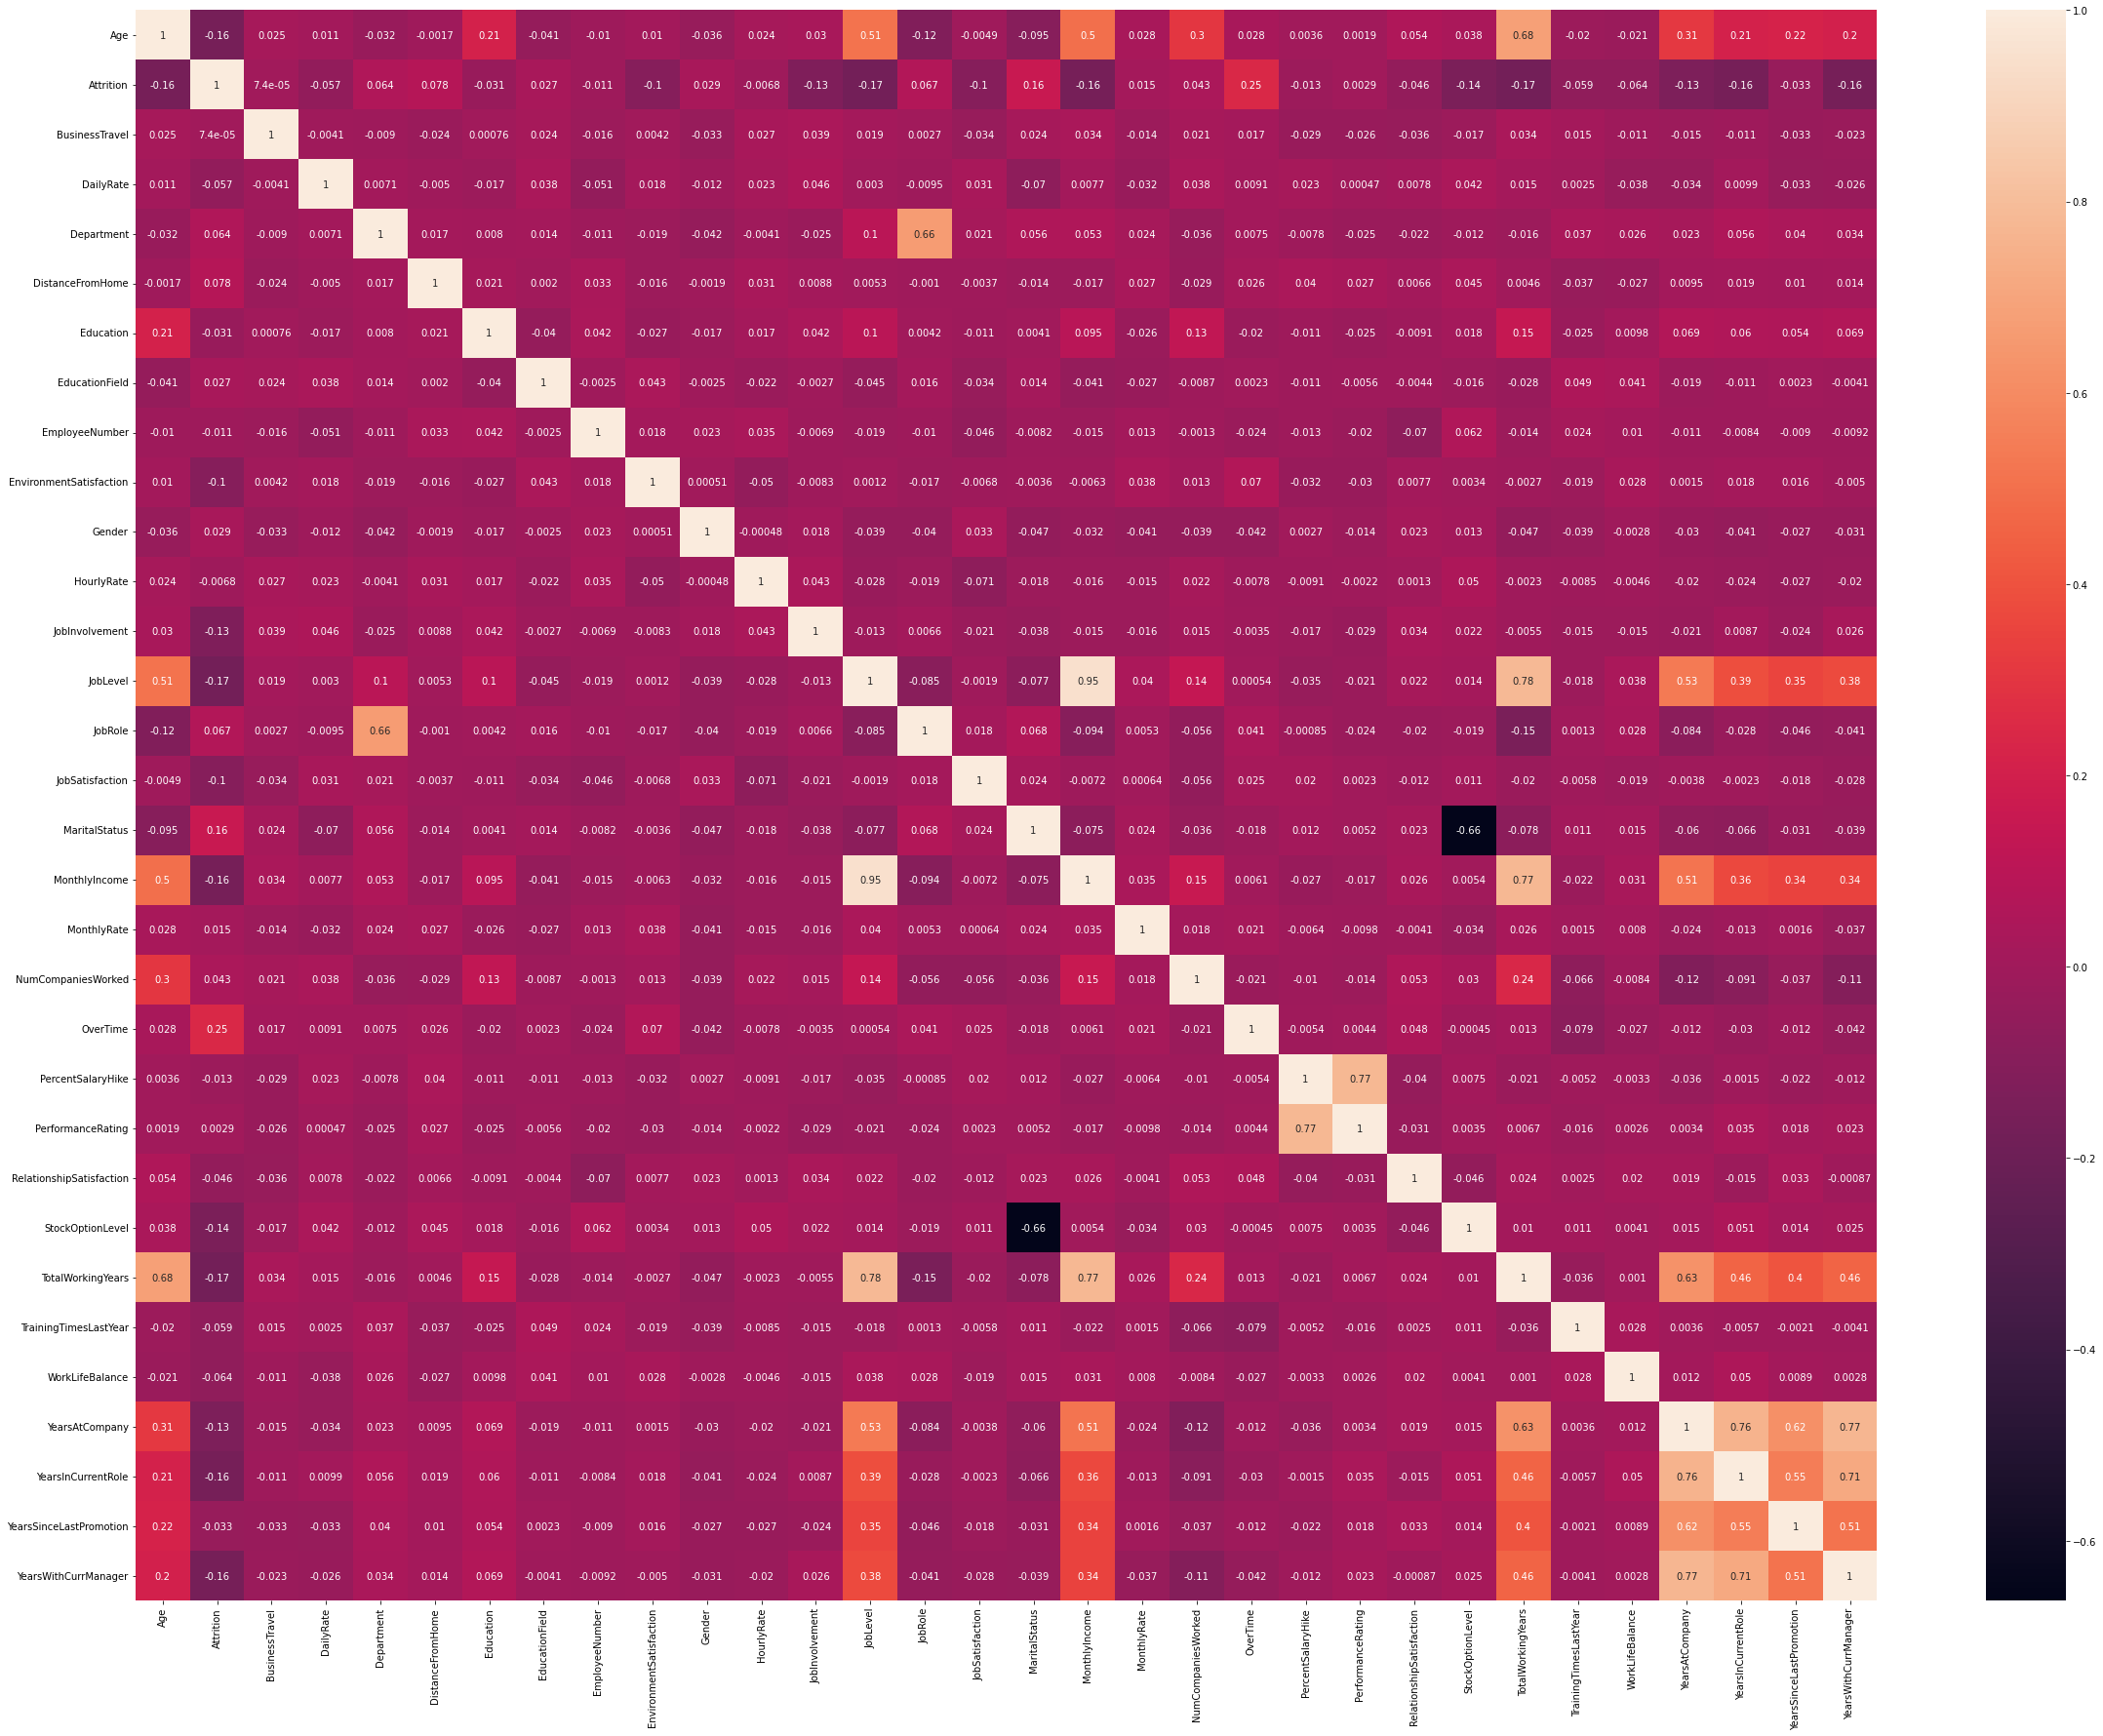

In [91]:
plt.figure(figsize=(40,30))

sns.heatmap(corr,annot=True)
plt.show()

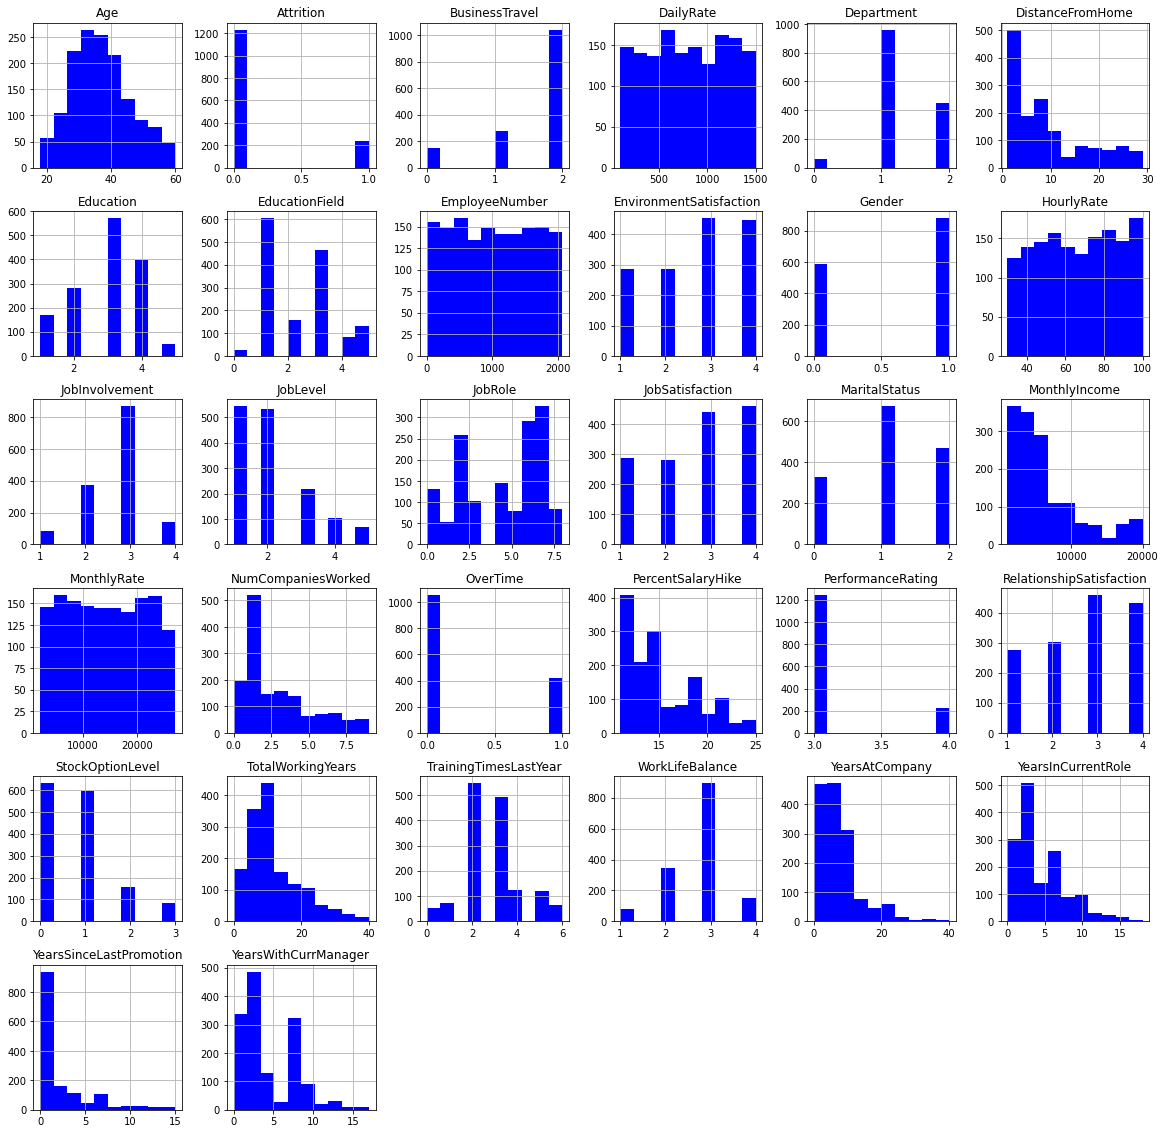

In [20]:
data.hist(color='b',figsize=(20,20))
plt.show()

In [21]:
new_data=data[['Age','DailyRate','EmployeeNumber','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike']]

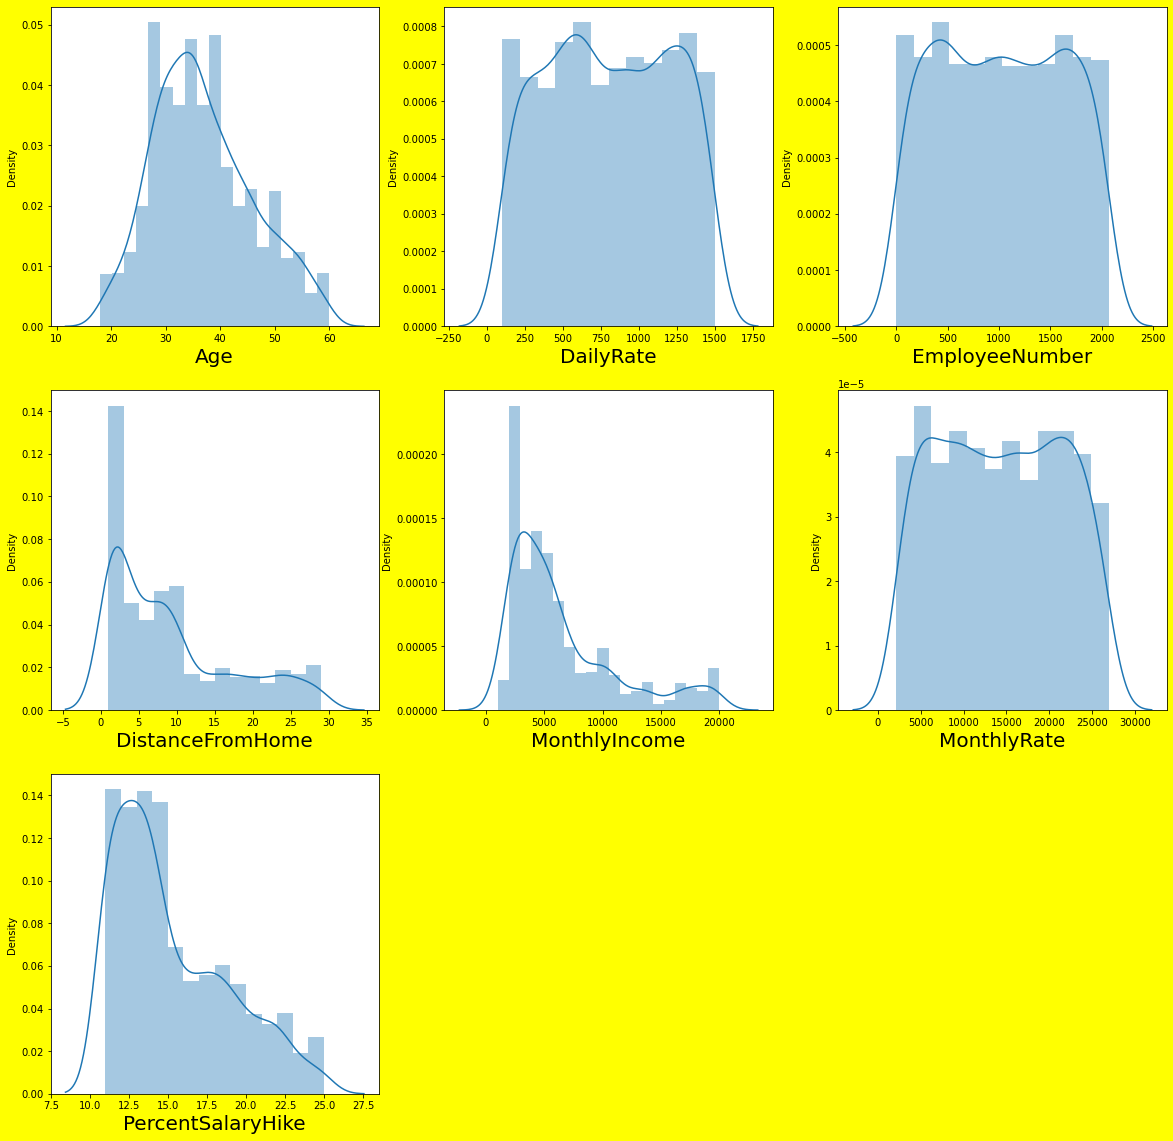

In [22]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for column in new_data:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#from above observation from distplot and shewness of data,many column are showing skewness but maximum are categorical data and for continious data there are distance from home,monthly income,percent salary income

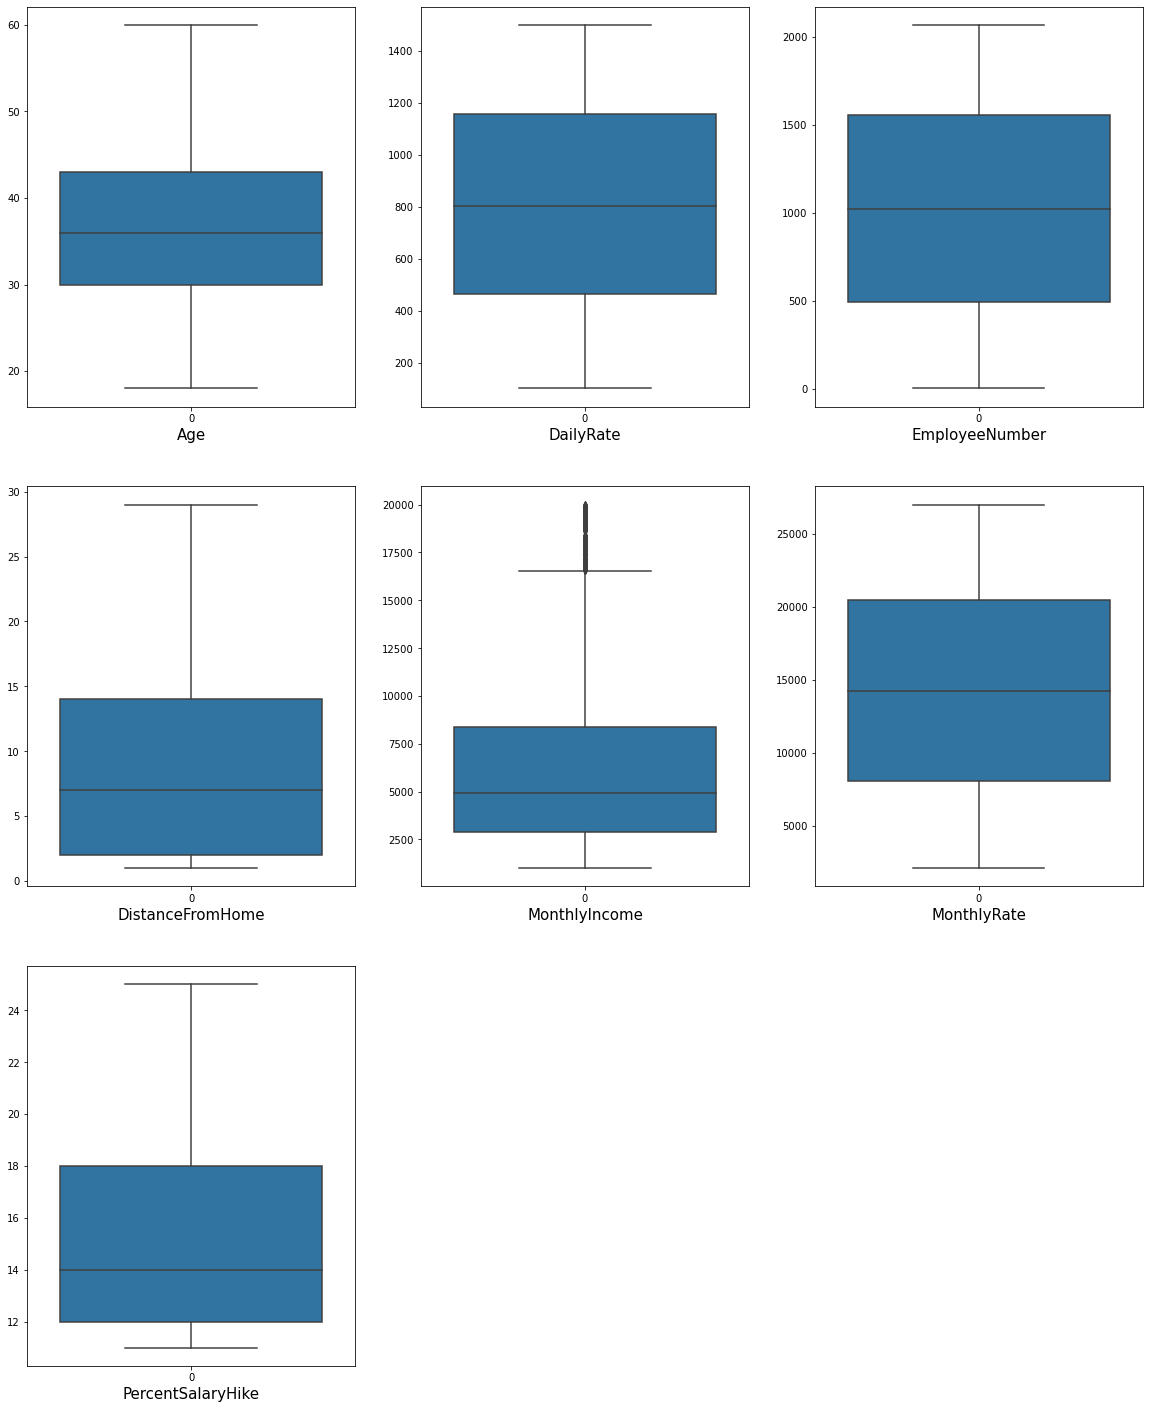

In [23]:
#boxplot has been ploted to detect the outliers
plt.figure(figsize=(20,25))
plotnumber=1
for column in new_data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=new_data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [24]:
X=data.drop(columns=['Attrition'])
y=data['Attrition']

In [25]:
X.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

#from above observation from distplot and shewness of data,many column are showing skewness but maximum are categorical data and for continious data there are distance from home,monthly income,percent salary income

applying power transformation to remove the skewness from the data

In [26]:
from sklearn.preprocessing import power_transform

In [27]:
x_new=power_transform(X)

In [28]:
x_new

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [29]:
x_data=pd.DataFrame(x_new,columns=X.columns)

x_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,-2.164110,-0.706596,-1.224745,...,-0.423557,-1.529513,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,-2.154174,0.208597,0.816497,...,2.348814,1.229016,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,-2.136953,1.209516,0.816497,...,-0.423557,-0.700130,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,-2.129176,1.209516,-1.224745,...,-0.423557,0.225164,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,-2.114724,-1.518118,0.816497,...,-0.423557,1.229016,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881


In [30]:
x_data.skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
JobLevel                    0.103624
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
NumCompaniesWorked          0.014814
Department                  0.013801
MonthlyIncome               0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
E

In [45]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_data)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:

#variance inflation factor has been find to multicolinearity between the features
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=x_data.columns
vif

,vif,Features
0,2.104399,Age
1,1.012928,BusinessTravel
2,1.024583,DailyRate
3,2.027121,Department
4,1.012932,DistanceFromHome
5,1.070832,Education
6,1.027280,EducationField
7,1.025481,EmployeeNumber
8,1.020401,EnvironmentSatisfaction
9,1.021375,Gender


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=49)
y_train.head()

841     0
1155    0
455     0
1441    0
236     1
Name: Attrition, dtype: int32

# Logistic Regression

In [50]:
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred=log_reg.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [54]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8722826086956522

In [55]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[299,   5],
       [ 42,  22]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report

In [57]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       304
           1       0.81      0.34      0.48        64

    accuracy                           0.87       368
   macro avg       0.85      0.66      0.71       368
weighted avg       0.87      0.87      0.85       368



# Decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
clf.score(x_train,y_train)

1.0

In [66]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.782608695652174

# KNN CLASSIFIER

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn=KNeighborsClassifier()

In [69]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred2=knn.predict(x_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [75]:
cfm=confusion_matrix(y_test,y_pred2)
cfm

array([[302,   2],
       [ 52,  12]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred2,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       304
           1       0.86      0.19      0.31        64

    accuracy                           0.85       368
   macro avg       0.86      0.59      0.61       368
weighted avg       0.85      0.85      0.81       368



After comparing the results of all the three models logistic regression have been chosen

CROSS VALIDATION SCORE FOR LOGISTIC REGRESSION

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
scores = cross_val_score(log_reg, X, y, cv=10)
scores

array([0.84353741, 0.83673469, 0.84353741, 0.83673469, 0.84353741,
       0.84353741, 0.83673469, 0.84353741, 0.84353741, 0.84353741])

In [79]:
cross_val_score(log_reg, X, y, cv=10).mean()

0.8414965986394558

# ROC_AUC CURVE

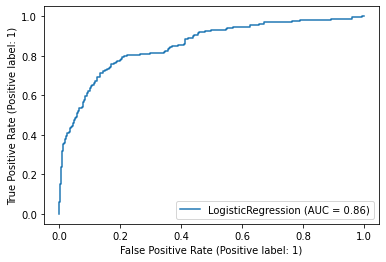

In [83]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(log_reg,x_train,y_train)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

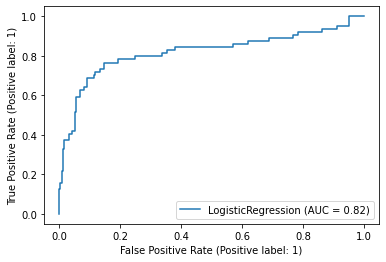

In [84]:
disp=plot_roc_curve(log_reg,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

saving the model

In [87]:
import pickle

In [88]:
filename='HR_ANALYTICS'
pickle.dump(clf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))